In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../..")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/jaxneurorl/projects/humansf
changing to root directory
at directory: /Users/wilka/git/research/jaxneurorl


In [32]:
from craftax.craftax_env import make_craftax_env_from_name
import jax
import numpy as np
import jax.numpy as jnp
from functools import partial
from craftax.craftax.renderer import render_craftax_pixels
from craftax.craftax import constants
import matplotlib.pyplot as plt



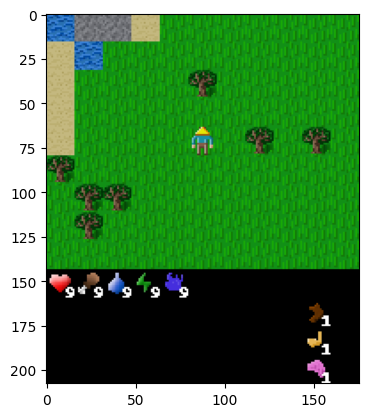

In [37]:
render = jax.jit(partial(render_craftax_pixels, block_pixel_size=constants.BLOCK_PIXEL_SIZE_IMG))
def render_craftax(state):
    image = render_craftax_pixels(state, block_pixel_size=constants.BLOCK_PIXEL_SIZE_IMG)
    return image/255.0
    
render_craftax = jax.jit(render_craftax)

env = make_craftax_env_from_name("Craftax-Symbolic-v1", auto_reset=True)
env_params = env.default_params

seed = 7
rng = jax.random.PRNGKey(seed)

obs, env_state = env.reset_env(rng, env_params)
image = render_craftax(env_state)
plt.imshow(image)

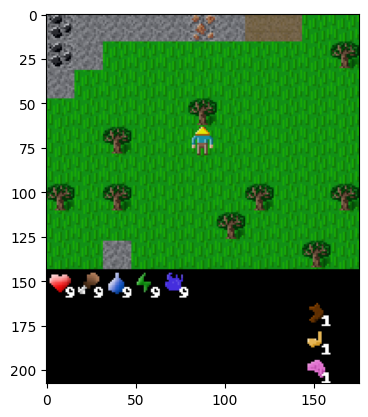

In [38]:
seed = 9
rng = jax.random.PRNGKey(seed)

obs, env_state = env.reset_env(rng, env_params)
image = render_craftax(env_state)
plt.imshow(image)

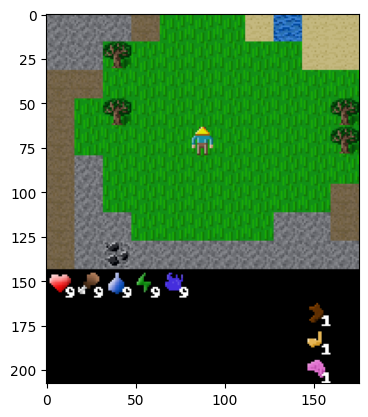

In [39]:
seed = 10
rng = jax.random.PRNGKey(seed)

obs, env_state = env.reset_env(rng, env_params)
image = render_craftax(env_state)
plt.imshow(image)

In [ ]:
# env = OptimisticResetVecEnvWrapper(
#     env,
#     num_envs=1,
#     reset_ratio=min(config["OPTIMISTIC_RESET_RATIO"], config["NUM_ENVS"]),
# )

In [4]:
# import jax
# import jax.tree_util as jtu
# import jax.numpy as jnp
# import os.path
# import numpy as np

# import matplotlib.pyplot as plt


# from projects.humansf import housemaze_trainer as trainer
# import housemaze
# from housemaze import levels
# from housemaze import utils
# from housemaze import renderer
# from housemaze.env import KeyboardActions
# from housemaze.human_dyna import multitask_env
# from housemaze.human_dyna import mazes
# from housemaze.human_dyna import sf_task_runner

wandb: WARNING `wandb.require('core')` is redundant as it is now the default behavior.
/Users/wilka/miniforge3/envs/jaxneurorl/lib/python3.10/site-packages/distrax/_src/utils/conversion.py:145: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return x.astype(jnp.float_)


In [5]:
# rendering fns
def display_image(image):
    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

def render_timestep(timestep):
    image = renderer.create_image_from_grid(
        timestep.state.grid,
        timestep.state.agent_pos,
        timestep.state.agent_dir,
        image_dict)
    plt.imshow(image)
    plt.show()

No file specified for image dict.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/image_data.pkl


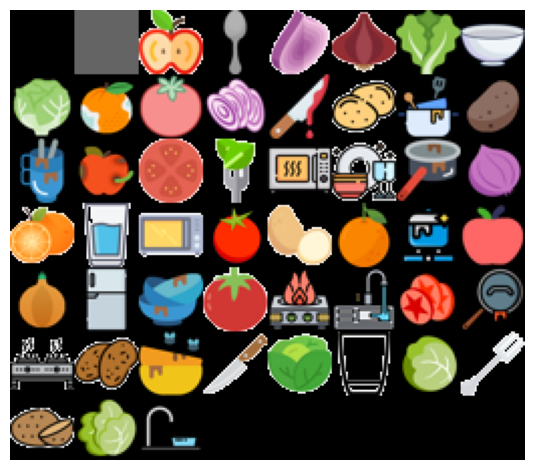

((224, 256, 3),
 ['empty', 'wall', 'apple_sliced', 'spoon', 'onion_sliced_cooked'])

In [6]:
# load images and display them
image_dict = utils.load_image_dict()
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
display_image(image)
image.shape, image_dict['keys'][:5]

In [7]:
char2idx, groups, task_objects = mazes.get_group_set(2)
task_runner = multitask_env.TaskRunner(task_objects=task_objects)


No file specified for groups.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


In [8]:
task_objects = groups.reshape(-1)
task_objects

array([26, 40, 47, 43], dtype=int32)

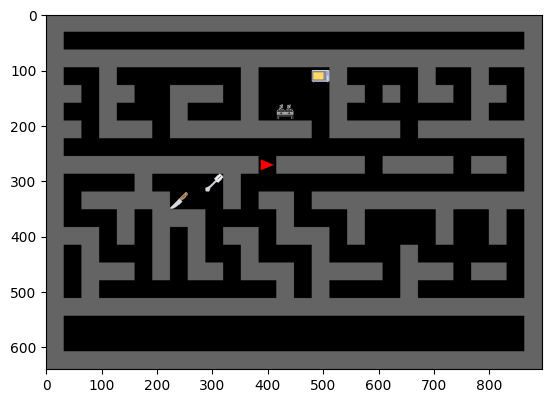

Array([0.  , 0.  , 0.  , 0.  , 0.05, 0.05, 0.05, 0.05], dtype=float32)

In [38]:
def get_params(maze_str: str = None):
  maze_str = maze_str or mazes.maze0
  return mazes.get_maze_reset_params(
      groups=groups,
      char2key=char2idx,
      maze_str=maze_str,
      randomize_agent=False,
      make_env_params=True,
)

# env_params = get_params(mazes.big_test_level)
# task_actions = [
#     KeyboardActions.up,
#     KeyboardActions.up,
#     KeyboardActions.up,
#     KeyboardActions.right,
# ]
env_params = get_params(mazes.big_practice_maze)
task_actions = [
    KeyboardActions.down,
    KeyboardActions.left,
    KeyboardActions.down,
    KeyboardActions.down,
    KeyboardActions.left,
    KeyboardActions.left,
    KeyboardActions.up,
    KeyboardActions.left,
    KeyboardActions.left,
]

seed = 7
rng = jax.random.PRNGKey(seed)

task_runner = sf_task_runner.TaskRunner(
    task_objects=task_objects,
    radius=5,
)
env = multitask_env.HouseMaze(
    task_runner=task_runner,
    num_categories=len(image_dict['keys']),
)
env = utils.AutoResetWrapper(env)

reset = jax.jit(env.reset)
reset_timestep = reset(rng, env_params)
render_timestep(reset_timestep)
reset_timestep.observation.state_features

features: [0.   0.   0.   0.   0.   0.05 0.05 0.05] | discount: 1.0 | reward: 0.0


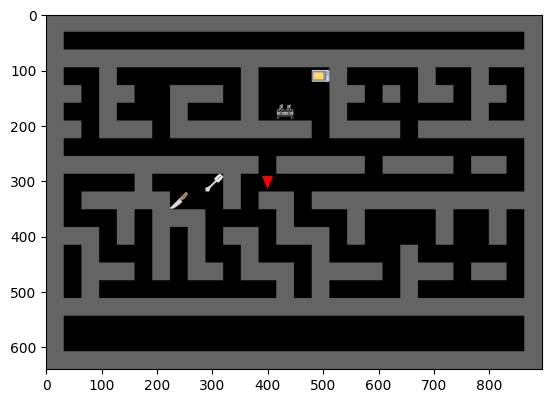

features: [0.   0.   0.   0.   0.   0.05 0.05 0.05] | discount: 1.0 | reward: 0.0


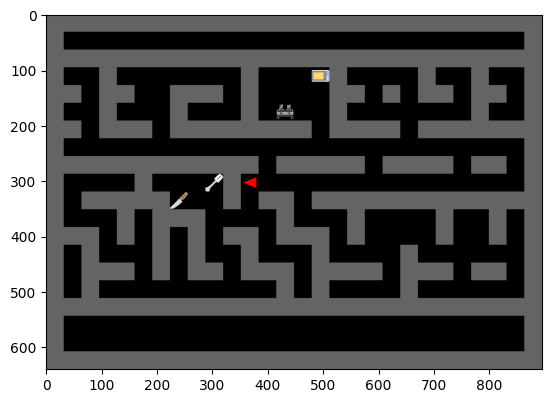

features: [0.   0.   0.   0.   0.   0.05 0.05 0.05] | discount: 1.0 | reward: 0.0


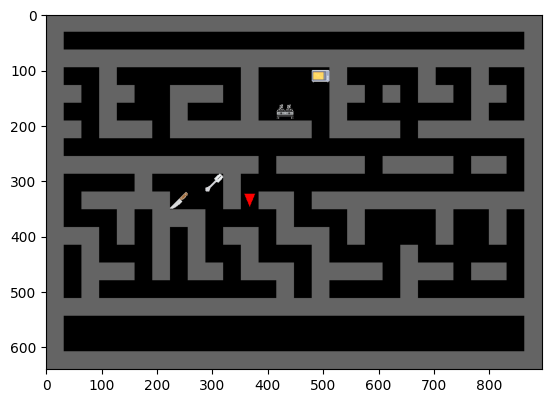

features: [0.   0.   0.   0.   0.   0.   0.05 0.05] | discount: 1.0 | reward: 0.0


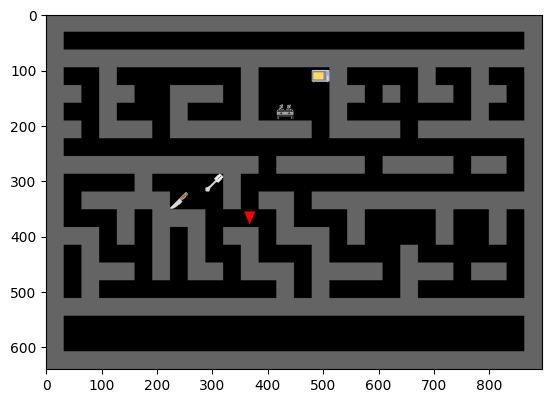

features: [0.   0.   0.   0.   0.   0.   0.05 0.05] | discount: 1.0 | reward: 0.0


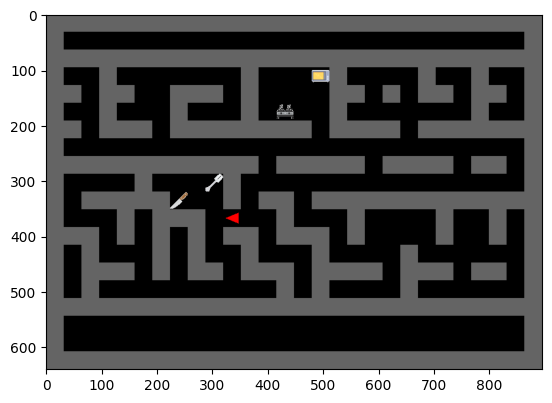

features: [0.   0.   0.   0.   0.   0.   0.05 0.05] | discount: 1.0 | reward: 0.0


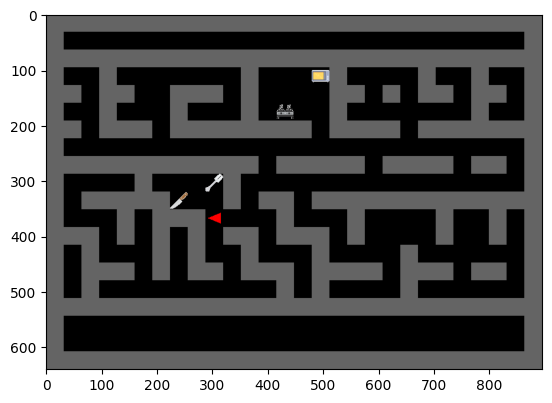

features: [0.   0.   0.   0.   0.   0.05 0.05 0.05] | discount: 1.0 | reward: 0.0


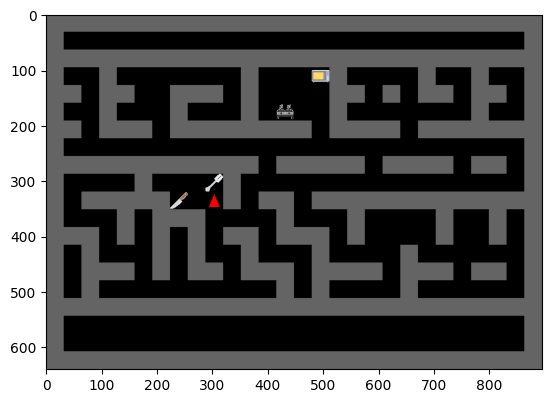

features: [0.   0.   0.   0.   0.   0.05 0.05 0.05] | discount: 1.0 | reward: 0.0


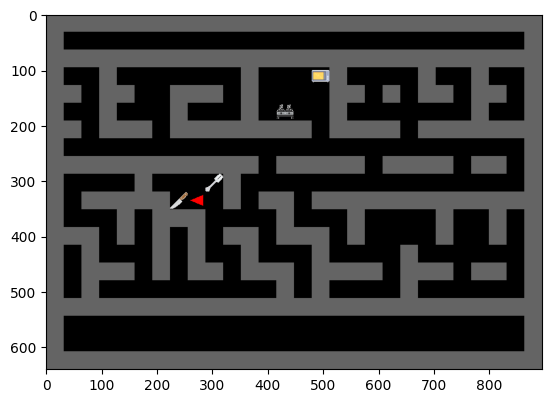

features: [0.   0.   0.   1.   0.   0.   0.05 0.  ] | discount: 0.0 | reward: 0.0


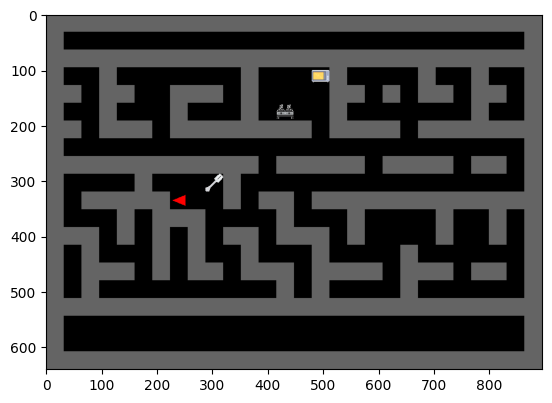

In [42]:
# test that
timestep = reset_timestep

for a in task_actions:
    timestep = env.step(rng, timestep, a, env_params)
    print('features:', timestep.observation.state_features, '| discount:', timestep.discount, '| reward:', timestep.reward,)
    render_timestep(timestep)
